In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import seaborn as sns

In [2]:
customer_data = pd.read_csv(r'Dataset_Foodo_V2.0.csv')

In [3]:
columns = customer_data.columns.values.tolist()
print(columns)

['restaurant_id', 'restaurant_name', 'restaurant_enabled', 'restaurant_city', 'restaurant_postcode', 'restaurant_country_code', 'restaurant_email', 'years_creation', 'Customer_id', 'customer_gender', 'problem', 'restaurant_type', 'invoice_payment_method', 'january_2021', 'february_2021', 'march_2021', 'april_2021', 'may_2021', 'juin_2021', 'july_2021', 'august_2021', 'september_2021', 'october_2021', 'november_2021', 'december_2021']


In [4]:
customer_data.describe()

,restaurant_id,restaurant_enabled,restaurant_postcode,years_creation,Customer_id,problem,restaurant_type,january_2021,february_2021,march_2021,april_2021,may_2021,juin_2021,july_2021,august_2021,september_2021,october_2021,november_2021,december_2021
count,5000.000000,5000.0,5000.00000,5000.000000,5000.000000,5000.000000,229.000000,4652.000000,4627.000000,4627.000000,4652.000000,4941.000000,4.941000e+03,4918.000000,4918.000000,4949.000000,4949.000000,4956.000000,4956.000000
mean,2403.591200,1.0,75404.23740,3.238600,2432.407400,4.365800,11.694323,102472.190886,95040.788200,132738.618976,83534.426268,175643.422384,4.196885e+05,252473.270028,240031.447336,299858.723176,331717.329157,344530.146691,393908.215295
std,5711.058594,0.0,2688.98296,0.636358,5740.165952,1.716793,1.725204,98207.642935,76172.099371,113115.606862,94645.456444,143901.312670,4.187783e+05,211668.635360,176330.608505,242993.041864,282544.343116,276254.383416,335415.122051
min,54.000000,1.0,75001.00000,1.000000,57.000000,1.000000,2.000000,12056.000000,4463.000000,15677.000000,9698.000000,19472.000000,4.454600e+04,6811.000000,11543.000000,21340.000000,14453.000000,16423.000000,9700.000000
25%,54.000000,1.0,75011.00000,3.000000,125.000000,3.000000,12.000000,12056.000000,4463.000000,15677.000000,9698.000000,19472.000000,6.401600e+04,31522.000000,64583.000000,25908.000000,28214.000000,31281.000000,93740.000000
50%,769.000000,1.0,75012.00000,3.000000,781.000000,5.000000,12.000000,94531.000000,108705.000000,145470.000000,40340.000000,115093.000000,2.726150e+05,143307.000000,136426.000000,225967.000000,243510.000000,249277.000000,228975.000000
75%,834.000000,1.0,75012.00000,4.000000,846.000000,6.000000,12.000000,116329.000000,115260.000000,199511.000000,115351.000000,342709.000000,1.112447e+06,559471.000000,389635.000000,581403.000000,742433.000000,727675.000000,886205.000000
max,25972.000000,1.0,94400.00000,4.000000,26098.000000,6.000000,12.000000,427900.000000,279821.000000,473864.000000,394600.000000,495077.000000,1.112447e+06,559471.000000,566423.000000,646213.000000,742433.000000,727675.000000,889839.000000


In [5]:
customer_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   restaurant_id            5000 non-null   int64  
 1   restaurant_name          5000 non-null   object 
 2   restaurant_enabled       5000 non-null   int64  
 3   restaurant_city          3233 non-null   object 
 4   restaurant_postcode      5000 non-null   int64  
 5   restaurant_country_code  5000 non-null   object 
 6   restaurant_email         4863 non-null   object 
 7   years_creation           5000 non-null   int64  
 8   Customer_id              5000 non-null   int64  
 9   customer_gender          5000 non-null   object 
 10  problem                  5000 non-null   int64  
 11  restaurant_type          229 non-null    float64
 12  invoice_payment_method   5000 non-null   object 
 13  january_2021             4652 non-null   float64
 14  february_2021           

In [6]:
customer_data.isnull().sum()

restaurant_id                 0
restaurant_name               0
restaurant_enabled            0
restaurant_city            1767
restaurant_postcode           0
restaurant_country_code       0
restaurant_email            137
years_creation                0
Customer_id                   0
customer_gender               0
problem                       0
restaurant_type            4771
invoice_payment_method        0
january_2021                348
february_2021               373
march_2021                  373
april_2021                  348
may_2021                     59
juin_2021                    59
july_2021                    82
august_2021                  82
september_2021               51
october_2021                 51
november_2021                44
december_2021                44
dtype: int64

In [7]:
dataset = customer_data.drop(['restaurant_id', 'restaurant_name', 'Customer_id','restaurant_enabled','restaurant_email','restaurant_postcode','restaurant_country_code'], axis=1)

Index(['u', 'f', 'm'], dtype='object')


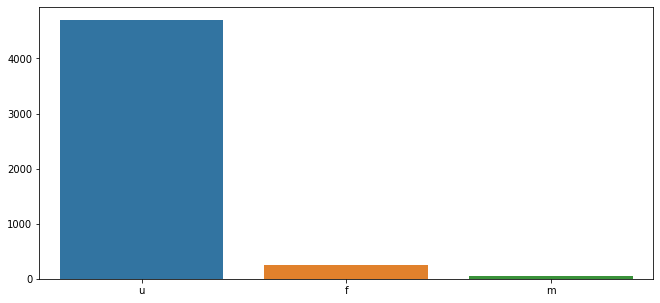

In [8]:
genders = dataset.customer_gender.value_counts()
print(genders.index)
plt.figure(figsize=(11,5))
sns.barplot(x=genders.index, y=genders.values)
plt.show()

In [9]:
enc = LabelEncoder()
enc.fit(dataset['customer_gender'])
dataset['customer_gender'] = enc.transform(dataset['customer_gender'])

In [10]:
dataset['restaurant_city'] = dataset['restaurant_city'].fillna('Unknown')

Index(['PARIS', 'UNKNOWN', 'VITRY SUR SEINE', 'BOULOGNE-BILLANCOURT',
       'AUBERVILLIERS'],
      dtype='object')


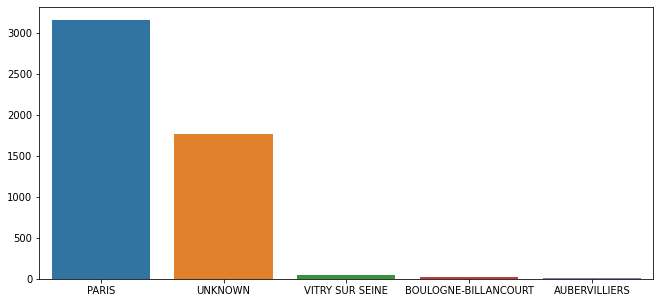

In [11]:
dataset['restaurant_city'] = dataset['restaurant_city'].str.upper()
cities = dataset.restaurant_city.value_counts()
print(cities.index)
plt.figure(figsize=(11,5))
sns.barplot(x=cities.index, y=cities.values)
plt.show()

In [12]:
enc = LabelEncoder()
enc.fit(dataset['restaurant_city'])
dataset['restaurant_city'] = enc.transform(dataset['restaurant_city'])

Index(['A CREDIT', 'CB', 'CB ', 'CHEQUE'], dtype='object')


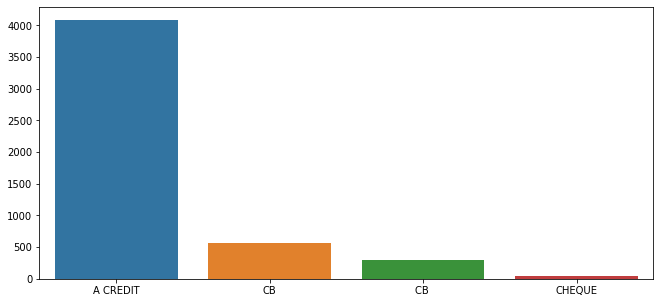

In [13]:
dataset['invoice_payment_method'] = dataset['invoice_payment_method'].str.upper()
payment_methode = dataset.invoice_payment_method.value_counts()
print(payment_methode.index)
plt.figure(figsize=(11,5))
sns.barplot(x=payment_methode.index, y=payment_methode.values)
plt.show()

In [14]:
dataset['invoice_payment_method'] = dataset['invoice_payment_method'].str.upper()
for i in range(dataset['invoice_payment_method'].shape[0]):
    if dataset['invoice_payment_method'].at[i] == 'CB ':
        dataset['invoice_payment_method'].at[i]=dataset['invoice_payment_method'].at[i].replace(" ", "")

Index(['A CREDIT', 'CB', 'CHEQUE'], dtype='object')


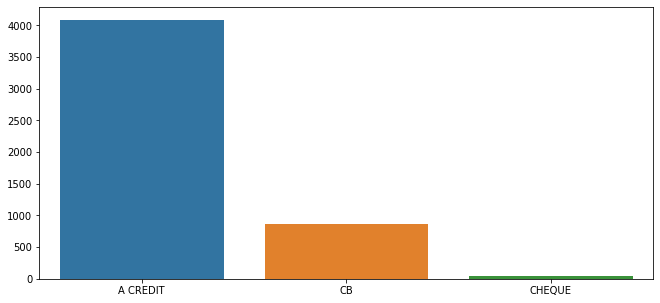

In [15]:

payment_methode = dataset.invoice_payment_method.value_counts()
print(payment_methode.index)
plt.figure(figsize=(11,5))
sns.barplot(x=payment_methode.index, y=payment_methode.values)
plt.show()

In [16]:
enc = LabelEncoder()
enc.fit(dataset['invoice_payment_method'])
dataset['invoice_payment_method'] = enc.transform(dataset['invoice_payment_method'])

In [17]:
dataset['january_2021'] = dataset['january_2021'].fillna(0)
dataset['february_2021'] = dataset['february_2021'].fillna(0)
dataset['march_2021'] = dataset['march_2021'].fillna(0)
dataset['april_2021'] = dataset['april_2021'].fillna(0)
dataset['may_2021'] = dataset['may_2021'].fillna(0)
dataset['juin_2021'] = dataset['juin_2021'].fillna(0)
dataset['july_2021'] = dataset['july_2021'].fillna(0)
dataset['august_2021'] = dataset['august_2021'].fillna(0)
dataset['september_2021'] = dataset['september_2021'].fillna(0)
dataset['october_2021'] = dataset['october_2021'].fillna(0)
dataset['november_2021'] = dataset['november_2021'].fillna(0)
dataset['december_2021'] = dataset['december_2021'].fillna(0)

In [18]:
dataset['restaurant_type'] = dataset['restaurant_type'].fillna(0)

In [19]:
dataset.isnull().sum()

restaurant_city           0
years_creation            0
customer_gender           0
problem                   0
restaurant_type           0
invoice_payment_method    0
january_2021              0
february_2021             0
march_2021                0
april_2021                0
may_2021                  0
juin_2021                 0
july_2021                 0
august_2021               0
september_2021            0
october_2021              0
november_2021             0
december_2021             0
dtype: int64

In [20]:
dataset = dataset.drop(['march_2021', 'april_2021', 'may_2021','juin_2021','july_2021','august_2021','september_2021','october_2021','november_2021','december_2021'], axis=1)

In [21]:
for i in range(dataset['february_2021'].shape[0]): #iterate over rows
    
        value = dataset['february_2021'].at[i] #get cell value
       
        if dataset['february_2021'].at[i]  == 0.0 :
           
            dataset['february_2021'].at[i] = int(0)
        else :
           
            dataset['february_2021'].at[i]=int(1)
dataset['february_2021'] = dataset['february_2021'].astype(int)

In [22]:
dataset

,restaurant_city,years_creation,customer_gender,problem,restaurant_type,invoice_payment_method,january_2021,february_2021
0,0,1,2,1,2.0,2,0.0,0
1,0,1,2,1,2.0,1,0.0,0
2,0,1,2,1,2.0,1,0.0,0
3,0,1,2,1,2.0,1,0.0,0
4,0,1,2,1,2.0,1,0.0,0
...,...,...,...,...,...,...,...,...
4995,2,2,2,6,0.0,1,78857.0,1
4996,2,2,2,6,0.0,1,78857.0,1
4997,2,2,2,6,0.0,1,78857.0,1
4998,2,2,2,6,0.0,1,78857.0,1


In [40]:
y = dataset.february_2021.values
X = dataset.drop('february_2021', axis = 1)
X = X.values

In [25]:
cols = X.columns

In [27]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       5000 non-null   float64
 1   1       5000 non-null   float64
 2   2       5000 non-null   float64
 3   3       5000 non-null   float64
 4   4       5000 non-null   float64
 5   5       5000 non-null   float64
 6   6       5000 non-null   float64
dtypes: float64(7)
memory usage: 273.6 KB


In [28]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.linear_model import LogisticRegression 

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=41)

In [42]:
X_train

array([[2.00000e+00, 3.00000e+00, 2.00000e+00, ..., 0.00000e+00,
        0.00000e+00, 1.70843e+05],
       [2.00000e+00, 3.00000e+00, 2.00000e+00, ..., 0.00000e+00,
        0.00000e+00, 1.70843e+05],
       [2.00000e+00, 2.00000e+00, 2.00000e+00, ..., 0.00000e+00,
        1.00000e+00, 3.49838e+05],
       ...,
       [3.00000e+00, 4.00000e+00, 2.00000e+00, ..., 0.00000e+00,
        0.00000e+00, 1.20560e+04],
       [3.00000e+00, 4.00000e+00, 2.00000e+00, ..., 0.00000e+00,
        0.00000e+00, 1.20560e+04],
       [2.00000e+00, 3.00000e+00, 2.00000e+00, ..., 0.00000e+00,
        1.00000e+00, 1.16329e+05]])

In [44]:

model=LogisticRegression( max_iter=500)
model.fit(X_train,y_train)
prediction_logreg=model.predict(X_test)
print(accuracy_score(y_test,prediction_logreg))


0.9946666666666667


In [32]:
y_test_score = model.decision_function(X_test)

In [33]:
#import joblib


In [34]:
  #filename = 'Completed_model.sav'

In [35]:
#joblib.dump(model, filename)

In [36]:
import pickle

In [50]:
pickle.dump(model , open('model1mois.pkl', 'wb'))

In [51]:
modeleDep = pickle.load(open('model1mois.pkl', 'rb'))

In [48]:
print(modeleDep.predict([[3.0, 1.0, 1.0, 0.0, 2.0, 1.0, 17093.0]]))

[0]
